<a href="https://colab.research.google.com/github/wiz124/chem169-git/blob/main/Li_Harry_RID_012_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Exercise 1
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors, EnumerateStereoisomers, Lipinski, rdMolDescriptors, Crippen
from rdkit.Chem.Draw import IPythonConsole
import py3Dmol
import numpy as np



df=pd.read_csv('hexoses_hexitols_dataset.csv')
display(df)

,Class,Name,SMILE,Pubchem_CID
0,Ketohexose,D-psicose,C1[C@H]([C@H]([C@H](C(O1)(CO)O)O)O)O,441036
1,Ketohexose,L-psicose,C([C@@H]([C@@H]([C@@H](C(=O)CO)O)O)O)O,11961810
2,Ketohexose,D-fructose,C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O,2723872
3,Ketohexose,L-fructose,C([C@@H]([C@@H]([C@H](C(=O)CO)O)O)O)O,5460024
4,Ketohexose,D-tagatose,C([C@H]([C@@H]([C@@H](C(=O)COP(=O)(O)O)O)O)O)O...,189150
5,Ketohexose,L-tagatose,C([C@@H]([C@H]([C@H](C(=O)CO)O)O)O)O,10965117
6,Ketohexose,D-sorbose,C([C@H]([C@@H]([C@H](C(=O)CO)O)O)O)O,107428
7,Ketohexose,L-sorbose,C1[C@@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O,439192
8,Hexitol,D-galactitol,C([C@H]([C@@H]([C@@H]([C@H](CO)O)O)O)O)O,11850
9,Hexitol,L-galactitol,C([C@H]([C@@H]([C@@H]([C@H](CO)O)O)O)O)O,11850


In [18]:
#Exercise 2
for smile in df['SMILE']:
    print(smile)

C1[C@H]([C@H]([C@H](C(O1)(CO)O)O)O)O
C([C@@H]([C@@H]([C@@H](C(=O)CO)O)O)O)O
C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
C([C@@H]([C@@H]([C@H](C(=O)CO)O)O)O)O
C([C@H]([C@@H]([C@@H](C(=O)COP(=O)(O)O)O)O)O)OP(=O)(O)O
C([C@@H]([C@H]([C@H](C(=O)CO)O)O)O)O
C([C@H]([C@@H]([C@H](C(=O)CO)O)O)O)O
C1[C@@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
C([C@H]([C@@H]([C@@H]([C@H](CO)O)O)O)O)O
C([C@H]([C@@H]([C@@H]([C@H](CO)O)O)O)O)O
C([C@H]([C@H]([C@H]([C@@H](CO)O)O)O)O)O
C([C@@H]([C@H]([C@H]([C@H](CO)O)O)O)O)O
C([C@H]([C@@H]([C@H]([C@H](CO)O)O)O)O)O
C([C@H]([C@H]([C@@H]([C@H](CO)O)O)O)O)O
C([C@H]([C@H]([C@H]([C@@H](CO)O)O)O)O)O
C([C@@H]([C@H]([C@H]([C@H](CO)O)O)O)O)O
C([C@H]([C@H]([C@@H]([C@H](CO)O)O)O)O)O
C1[C@H]([C@@H]([C@H]([C@@H](O1)CO)O)O)O
C([C@H]([C@H]([C@H]([C@H](CO)O)O)O)O)O
C([C@H]([C@H]([C@H]([C@H](CO)O)O)O)O)O
C([C@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O)O
C([C@@H]([C@@H]([C@H]([C@H](CO)O)O)O)O)O
C([C@H]([C@@H]([C@H]([C@@H](CO)O)O)O)O)O
C([C@@H]([C@H]([C@@H]([C@H](CO)O)O)O)O)O


Exercise 2

A smiles string is a compact, ASCII-based, one-line text notation used to represent 2D/3D chemical structures for computer processing. It encodes molecular structure by listing atoms, using symbols for bonds, parentheses for branches, and numbers to indicate ring closures.

molecule name: D-psicose


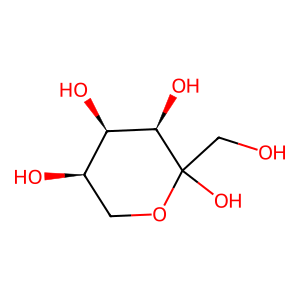

SMILES: C1[C@H]([C@H]([C@H](C(O1)(CO)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-psicose


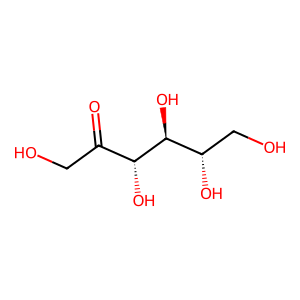

SMILES: C([C@@H]([C@@H]([C@@H](C(=O)CO)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-fructose


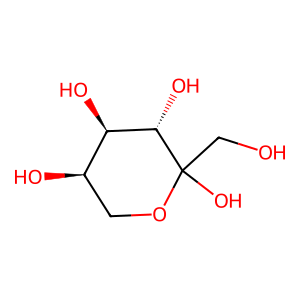

SMILES: C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-fructose


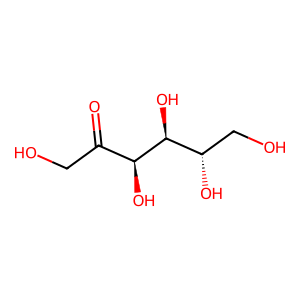

SMILES: C([C@@H]([C@@H]([C@H](C(=O)CO)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-tagatose


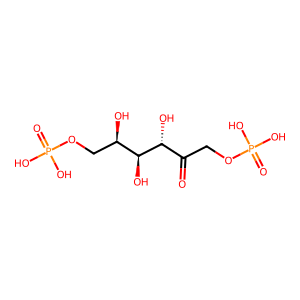

SMILES: C([C@H]([C@@H]([C@@H](C(=O)COP(=O)(O)O)O)O)O)OP(=O)(O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-tagatose


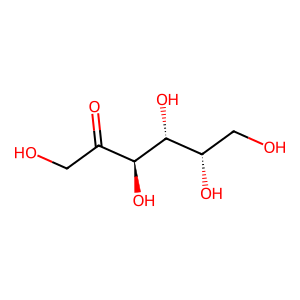

SMILES: C([C@@H]([C@H]([C@H](C(=O)CO)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-sorbose


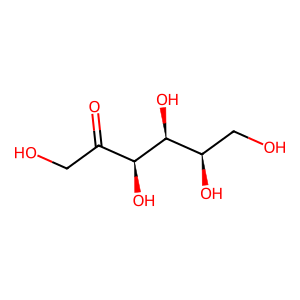

SMILES: C([C@H]([C@@H]([C@H](C(=O)CO)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-sorbose


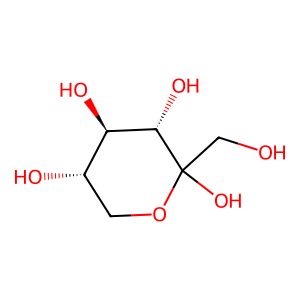

SMILES: C1[C@@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-galactitol


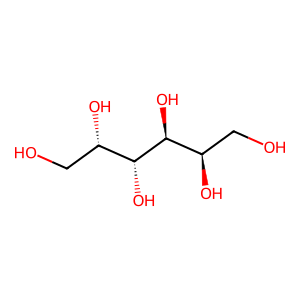

SMILES: C([C@H]([C@@H]([C@@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-galactitol


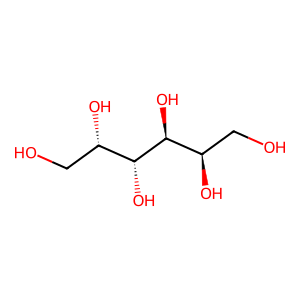

SMILES: C([C@H]([C@@H]([C@@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-altritol


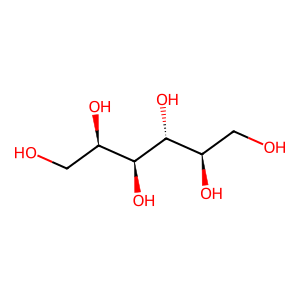

SMILES: C([C@H]([C@H]([C@H]([C@@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-altritol


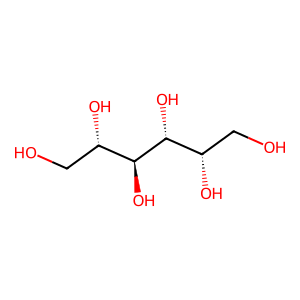

SMILES: C([C@@H]([C@H]([C@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-gulitol


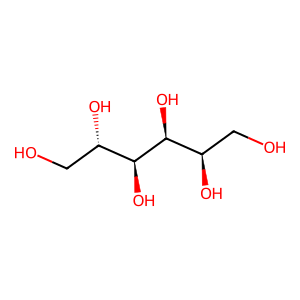

SMILES: C([C@H]([C@@H]([C@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-gulitol


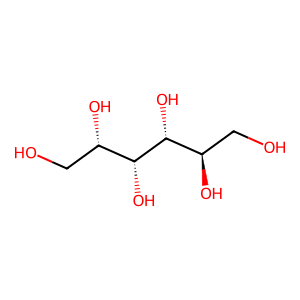

SMILES: C([C@H]([C@H]([C@@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-talitol


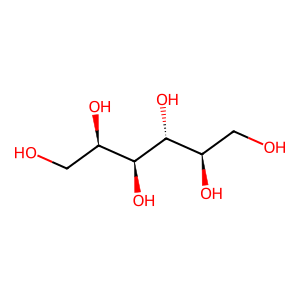

SMILES: C([C@H]([C@H]([C@H]([C@@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-talitol


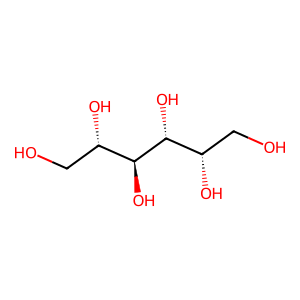

SMILES: C([C@@H]([C@H]([C@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-glucitol


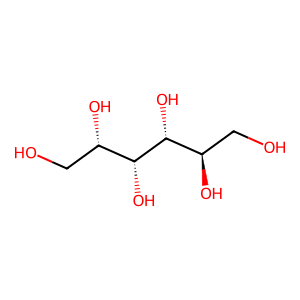

SMILES: C([C@H]([C@H]([C@@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-glucitol


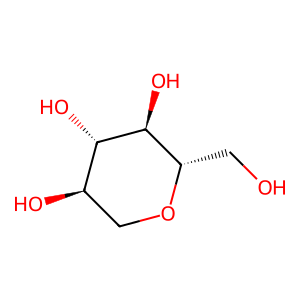

SMILES: C1[C@H]([C@@H]([C@H]([C@@H](O1)CO)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-allitol


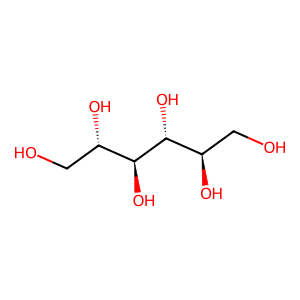

SMILES: C([C@H]([C@H]([C@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-allitol


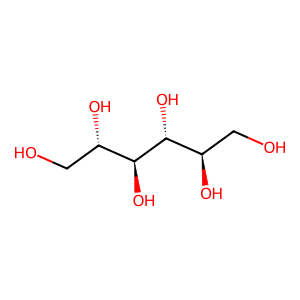

SMILES: C([C@H]([C@H]([C@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-mannitol


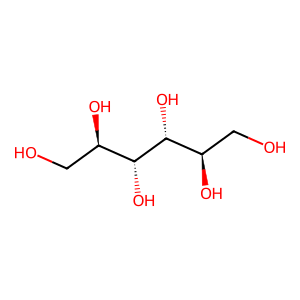

SMILES: C([C@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-mannitol


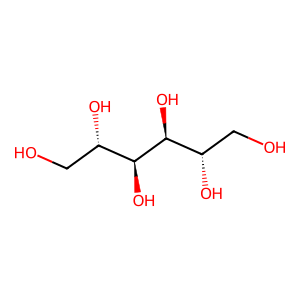

SMILES: C([C@@H]([C@@H]([C@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: D-iditol


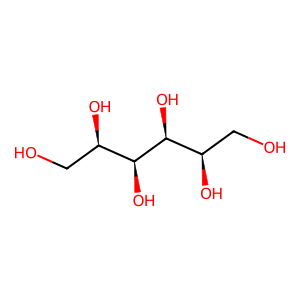

SMILES: C([C@H]([C@@H]([C@H]([C@@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.


molecule name: L-iditol


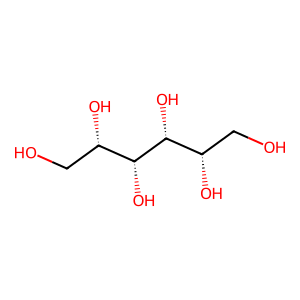

SMILES: C([C@@H]([C@H]([C@@H]([C@H](CO)O)O)O)O)O


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [19]:
#Exercise 3
def find_stereoisomer_pairs(df):
    #Find D/L stereoisomer pairs
    pairs = {}

    for idx, row in df.iterrows():
        name = row['Name']
        # Extract base name (remove D-/L- prefix)
        if name.startswith('D-') or name.startswith('L-'):
            base_name = name[2:]
            stereochem = name[0]  # 'D' or 'L'

            if base_name not in pairs:
                pairs[base_name] = {'D': None, 'L': None}

            pairs[base_name][stereochem] = idx
    complete_pairs = {
        name: data for name, data in pairs.items()
        if data['D'] is not None and data['L'] is not None
    }

    return complete_pairs
def get_3d_molecule(smiles):
    """Generates 3D coordinates for a molecule."""
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    AllChem.MMFFOptimizeMolecule(mol)
    return mol

def moleculedisplay(name, smiles,inversesmile):
  mol=Chem.MolFromSmiles(smiles)
  print(f'molecule name: {name}')
  display(Draw.MolToImage(mol))
  print(f'SMILES: {smiles}')

  ori_mol = get_3d_molecule(smiles)
  inv_mol = get_3d_molecule(smiles)

  view = py3Dmol.view(width=800, height=400, viewergrid=(1, 2))
  #original molecule
  view.addModel(Chem.MolToMolBlock(ori_mol), 'sdf', viewer=(0, 0))
  view.setStyle({'stick': {}}, viewer=(0, 0))
  view.zoomTo(viewer=(0, 0))

  #inverse molecule
  view.addModel(Chem.MolToMolBlock(inv_mol), 'sdf', viewer=(0, 1))
  view.setStyle({'stick': {}}, viewer=(0, 1))
  view.zoomTo(viewer=(0, 1))

  view.show()

  print('='*80)
  print()

pairs=find_stereoisomer_pairs(df)


# mol_list=[Chem.MolFromSmiles(smile) for smile in df['SMILE']]
mol_dict={}
for i in range(len(df)):
  mol_dict[str(df.at[i, 'Name'])]=df.at[i,'SMILE']

for name in df['Name']:
   if name.startswith('D'):
      inverseidx=pairs[name[2:]]['L']
      inversesmile=df.at[inverseidx,'SMILE']
   else:
      inverseidx=pairs[name[2:]]['D']
      inversesmile=df.at[inverseidx,'SMILE']

   #inversesmile is the mol object of the other stereoisomer
   moleculedisplay(name, mol_dict[name],inversesmile)

Exercise 3

RDkit does not draw Fischer projections. Fischer projections are used to draw out stereochemistry of complex molecules which simplifies understanding.


Exercise 4

Smiles encode stereochemistry by using chiral "@" symbols for chiral centers and "/" or "\" for E/Z configuration. Chiral centers use @ (clockwise) or @@ (anticlockwise), while / or \ indicate cis/trans orientation

D-glucitol: C([C@H]([C@H]([C@@H]([C@H](CO)O)O)O)O)O


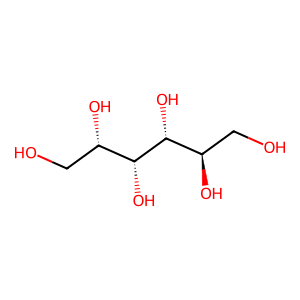

L-glucitol: OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CO


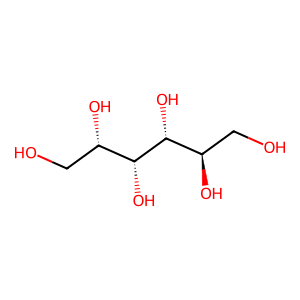

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [20]:
#Exercise 5

#note: idx is a list
idx=df.index[df['Name']=='D-glucitol']
smiles=df.at[idx[0], 'SMILE']
mol=Chem.MolFromSmiles(smiles)

print(f'D-glucitol: {smiles}')
display(Draw.MolToImage(mol))

options = EnumerateStereoisomers.StereoEnumerationOptions(unique=True, tryEmbedding=True)
isomers = tuple(EnumerateStereoisomers.EnumerateStereoisomers(
      mol,
      options=options)
)
print(f'L-glucitol: {Chem.MolToSmiles(isomers[0])}')
display(Draw.MolToImage(isomers[0]))

ori_mol = get_3d_molecule(smiles)
inv_mol = get_3d_molecule(Chem.MolToSmiles(isomers[0]))

view = py3Dmol.view(width=800, height=400, viewergrid=(2, 2))
#original molecule
view.addModel(Chem.MolToMolBlock(ori_mol), 'sdf', viewer=(0, 0))
view.setStyle({'stick': {}}, viewer=(0, 0))
view.zoomTo(viewer=(0, 0))
view.addLabel('D-glucitol', {'position': {'x': 0, 'y': 0, 'z': 0}}, viewer=(1, 0))

#inverse molecule
view.addModel(Chem.MolToMolBlock(inv_mol), 'sdf', viewer=(0, 1))
view.setStyle({'stick': {}}, viewer=(0, 1))
view.zoomTo(viewer=(0, 1))
view.addLabel('L-glucitol', {'position': {'x': 0, 'y': 0, 'z': 0}}, viewer=(1, 1))

view.show()


In [35]:
#Exercise 6
def molecule_property(smiles):
  mol = Chem.MolFromSmiles(smiles)
  descriptors= {
          'XLogP': Crippen.MolLogP(mol),
          'HBD': Lipinski.NumHDonors(mol),
          'HBA': Lipinski.NumHAcceptors(mol),
          'TPSA': rdMolDescriptors.CalcTPSA(mol),
          'MolWt': Descriptors.MolWt(mol)
      }

  return descriptors

properties=[]
for idx,row in df.iterrows():
  props = molecule_property(row['SMILE'])

  # Add molecule identifiers
  props['Name'] = row['Name']
  props['Class'] = row['Class']
  props['Chirality'] = row['Name'][:1]
  props['Base_Name'] = row['Name'][2:]
  props['Input_SMILES'] = row['SMILE']
  properties.append(props)

df2=pd.DataFrame(properties)
id_cols = ['Name', 'Class','Chirality', 'Base_Name']
property_cols = ['XLogP', 'HBD', 'HBA', 'TPSA', 'MolWt']
smiles_cols = ['Input_SMILES']

df2 = df2[id_cols + property_cols + smiles_cols]
print('properties')
display(df2)

d_molecules = df2[df2['Chirality'] == 'D'].set_index('Base_Name')
l_molecules = df2[df2['Chirality'] == 'L'].set_index('Base_Name')

# # Find common base names (molecules that have both D and L forms)
common_bases = sorted(set(d_molecules.index) & set(l_molecules.index))

# Compare properties for each D/L pair
comparison_data = []

for base_name in common_bases:
    d_props = d_molecules.loc[base_name]
    l_props = l_molecules.loc[base_name]

    comparison = {
        'Base_Name': base_name,
        'Class': d_props['Class']
    }

    # Compare each numerical property
    for prop in property_cols:
        d_val = d_props[prop]
        l_val = l_props[prop]

        comparison[f'D_{prop}'] = d_val
        comparison[f'L_{prop}'] = l_val
        comparison[f'Diff_{prop}'] = abs(d_val - l_val)

        # Check if values are identical (within floating point precision)
        if isinstance(d_val, (int, float)) and isinstance(l_val, (int, float)):
            comparison[f'Identical_{prop}'] = np.isclose(d_val, l_val, rtol=1e-9, atol=1e-12)
        else:
            comparison[f'Identical_{prop}'] = (d_val == l_val)

    comparison_data.append(comparison)

comparison_df = pd.DataFrame(comparison_data)
print('='*80)
print('Comparison Table')
display(comparison_df)


properties


,Name,Class,Chirality,Base_Name,XLogP,HBD,HBA,TPSA,MolWt,Input_SMILES
0,D-psicose,Ketohexose,D,psicose,-3.2198,5,6,110.38,180.156,C1[C@H]([C@H]([C@H](C(O1)(CO)O)O)O)O
1,L-psicose,Ketohexose,L,psicose,-3.3772,5,6,118.22,180.156,C([C@@H]([C@@H]([C@@H](C(=O)CO)O)O)O)O
2,D-fructose,Ketohexose,D,fructose,-3.2198,5,6,110.38,180.156,C1[C@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
3,L-fructose,Ketohexose,L,fructose,-3.3772,5,6,118.22,180.156,C([C@@H]([C@@H]([C@H](C(=O)CO)O)O)O)O
4,D-tagatose,Ketohexose,D,tagatose,-3.1432,7,8,211.28,340.114,C([C@H]([C@@H]([C@@H](C(=O)COP(=O)(O)O)O)O)O)O...
5,L-tagatose,Ketohexose,L,tagatose,-3.3772,5,6,118.22,180.156,C([C@@H]([C@H]([C@H](C(=O)CO)O)O)O)O
6,D-sorbose,Ketohexose,D,sorbose,-3.3772,5,6,118.22,180.156,C([C@H]([C@@H]([C@H](C(=O)CO)O)O)O)O
7,L-sorbose,Ketohexose,L,sorbose,-3.2198,5,6,110.38,180.156,C1[C@@H]([C@H]([C@@H](C(O1)(CO)O)O)O)O
8,D-galactitol,Hexitol,D,galactitol,-3.5854,6,6,121.38,182.172,C([C@H]([C@@H]([C@@H]([C@H](CO)O)O)O)O)O
9,L-galactitol,Hexitol,L,galactitol,-3.5854,6,6,121.38,182.172,C([C@H]([C@@H]([C@@H]([C@H](CO)O)O)O)O)O


Comparison Table


,Base_Name,Class,D_XLogP,L_XLogP,Diff_XLogP,Identical_XLogP,D_HBD,L_HBD,Diff_HBD,Identical_HBD,...,Diff_HBA,Identical_HBA,D_TPSA,L_TPSA,Diff_TPSA,Identical_TPSA,D_MolWt,L_MolWt,Diff_MolWt,Identical_MolWt
0,allitol,Hexitol,-3.5854,-3.5854,0.0000,True,6,6,0,True,...,0,True,121.38,121.38,0.00,True,182.172,182.172,0.000,True
1,altritol,Hexitol,-3.5854,-3.5854,0.0000,True,6,6,0,True,...,0,True,121.38,121.38,0.00,True,182.172,182.172,0.000,True
2,fructose,Ketohexose,-3.2198,-3.3772,0.1574,False,5,5,0,True,...,0,True,110.38,118.22,7.84,False,180.156,180.156,0.000,True
3,galactitol,Hexitol,-3.5854,-3.5854,0.0000,True,6,6,0,True,...,0,True,121.38,121.38,0.00,True,182.172,182.172,0.000,True
4,glucitol,Hexitol,-3.5854,-2.5398,1.0456,False,6,4,2,False,...,1,False,121.38,90.15,31.23,False,182.172,164.157,18.015,False
5,gulitol,Hexitol,-3.5854,-3.5854,0.0000,True,6,6,0,True,...,0,True,121.38,121.38,0.00,True,182.172,182.172,0.000,True
6,iditol,Hexitol,-3.5854,-3.5854,0.0000,True,6,6,0,True,...,0,True,121.38,121.38,0.00,True,182.172,182.172,0.000,True
7,mannitol,Hexitol,-3.5854,-3.5854,0.0000,True,6,6,0,True,...,0,True,121.38,121.38,0.00,True,182.172,182.172,0.000,True
8,psicose,Ketohexose,-3.2198,-3.3772,0.1574,False,5,5,0,True,...,0,True,110.38,118.22,7.84,False,180.156,180.156,0.000,True
9,sorbose,Ketohexose,-3.3772,-3.2198,0.1574,False,5,5,0,True,...,0,True,118.22,110.38,7.84,False,180.156,180.156,0.000,True


Exercise 6

Q1: RDKit can not distinguish between L and D enantiomers because the 2D shape are the same. Thus, the descriptors, which calculate based on the 2D shape, will return the same values.

Q2: This is important because biological systems are dependent on chirality. This would pose a problem for high throughput methods that look at the 2D fingerprints as they would return the same value. This would make them appear to be have the same acitvity.
